In [1]:
from collections import namedtuple
ModelHistory = namedtuple("ModelHistory", ["trainable_params", "total_params", "results", "test_loss", "test_accuracy"])

In [2]:
import pickle
with open("./out_files/MNIST_512_4_FFN_history.pkl", "rb") as f:
    vanilla_history = pickle.load(f)
with open("./out_files/MNIST_512_4_FFN_history_zero_shot.pkl", "rb") as f:
    zero_shot_history = pickle.load(f)
with open("./out_files/MNIST_512_4_FFN_history_finetuned.pkl", "rb") as f:
    ft_history = pickle.load(f)
with open("./out_files/MNIST_512_4_lora_experiment.pkl", "rb") as f:
    lora_histories = pickle.load(f)
with open("./out_files/MNIST_512_4_pre_mult_lora_FFN_history.pkl", "rb") as f:
    pre_mult_lora_history = pickle.load(f)
with open("./out_files/MNIST_512_4_pre_mult_lora_experiment.pkl", "rb") as f:
    pre_mult_r_lora_histories = pickle.load(f)
with open("./out_files/MNIST_512_4_post_mult_lora_FFN_history.pkl", "rb") as f:
    post_mult_lora_history = pickle.load(f)
with open("./out_files/MNIST_512_4_post_mult_lora_experiment.pkl", "rb") as f:
    post_mult_r_lora_histories = pickle.load(f)

Using device: cuda


In [3]:
import pandas as pd

In [4]:
data = {
    'n_original_model_params': [],
    'n_finetuning_params': [],
    'test_acc (finetuning)': [],
    'test_acc (zero_shot)': [],
    'n_Full_PreMult_LoRA_params': [],
    'test_acc (Full_PreMult_LoRA)': [],
    'n_Full_PostMult_LoRA_params': [],
    'test_acc (Full_PostMult_LoRA)': [],
    'rank': [],
    'n_LoRA_params': [],
    'test_acc (LoRA r)': [],
    'n_PreMult_LoRA_params': [],
    'test_acc (PreMult_LoRA r)': [],
    'n_PostMult_LoRA_params': [],
    'test_acc (PostMult_LoRA r)': [],
}

In [5]:
ranks = [2**i for i in range(10)]

In [6]:
for rank in ranks:
    data['n_original_model_params'].append(vanilla_history.trainable_params)
    data['n_finetuning_params'].append(ft_history.trainable_params)
    data['test_acc (finetuning)'].append(ft_history.test_accuracy)
    data['test_acc (zero_shot)'].append(zero_shot_history.test_accuracy)
    data['n_Full_PreMult_LoRA_params'].append(pre_mult_lora_history.trainable_params)
    data['test_acc (Full_PreMult_LoRA)'].append(pre_mult_lora_history.test_accuracy)
    data['n_Full_PostMult_LoRA_params'].append(post_mult_lora_history.trainable_params)
    data['test_acc (Full_PostMult_LoRA)'].append(post_mult_lora_history.test_accuracy)

    data['rank'].append(rank)
    data['n_LoRA_params'].append(lora_histories[rank].trainable_params)
    data['test_acc (LoRA r)'].append(lora_histories[rank].test_accuracy)
    data['n_PreMult_LoRA_params'].append(pre_mult_r_lora_histories[rank].trainable_params)
    data['test_acc (PreMult_LoRA r)'].append(pre_mult_r_lora_histories[rank].test_accuracy)
    data['n_PostMult_LoRA_params'].append(post_mult_r_lora_histories[rank].trainable_params)
    data['test_acc (PostMult_LoRA r)'].append(post_mult_r_lora_histories[rank].test_accuracy)

In [7]:
df = pd.DataFrame(data)
df

,n_original_model_params,n_finetuning_params,test_acc (finetuning),test_acc (zero_shot),n_Full_PreMult_LoRA_params,test_acc (Full_PreMult_LoRA),n_Full_PostMult_LoRA_params,test_acc (Full_PostMult_LoRA),rank,n_LoRA_params,test_acc (LoRA r),n_PreMult_LoRA_params,test_acc (PreMult_LoRA r),n_PostMult_LoRA_params,test_acc (PostMult_LoRA r)
0,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,1,5909,0.908455,6688,0.211479,5130,0.211685
1,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,2,11818,0.945690,13376,0.822465,10260,0.780704
2,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,4,23636,0.960502,26752,0.918330,20520,0.930878
3,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,8,47272,0.966879,53504,0.931290,41040,0.941576
4,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,16,94544,0.971199,107008,0.941576,82080,0.963176
5,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,32,189088,0.970788,214016,0.951039,164160,0.948982
6,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,64,378176,0.972845,428032,0.936227,328320,0.961736
7,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,128,756352,0.972022,856064,0.929850,656640,0.953302
8,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,256,1512704,0.963999,1712128,0.585271,1313280,0.950010
9,1460229,1460229,0.980662,0.389632,1925376,0.743057,1310745,0.972845,512,3025408,0.944456,3424256,0.224851,2626560,0.211479


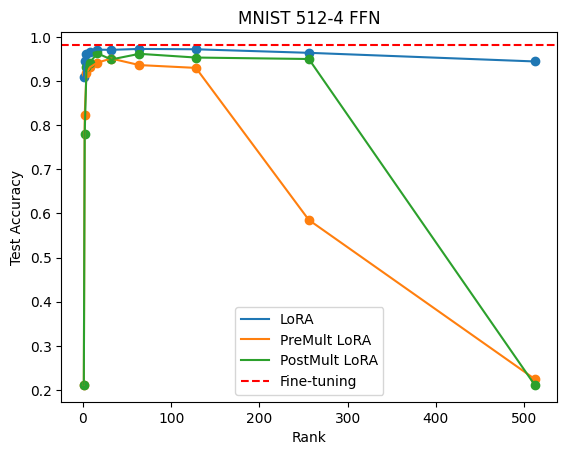

In [8]:
import matplotlib.pyplot as plt

# Plot lines
plt.plot(df['rank'], df['test_acc (LoRA r)'], label="LoRA")
plt.plot(df['rank'], df['test_acc (PreMult_LoRA r)'], label="PreMult LoRA")
plt.plot(df['rank'], df['test_acc (PostMult_LoRA r)'], label="PostMult LoRA")

# Add scatter points to highlight each rank
plt.scatter(df['rank'], df['test_acc (LoRA r)'], marker='o')
plt.scatter(df['rank'], df['test_acc (PreMult_LoRA r)'], marker='o')
plt.scatter(df['rank'], df['test_acc (PostMult_LoRA r)'], marker='o')

# Add a horizontal line for fine-tuning test accuracy
plt.axhline(y=ft_history.test_accuracy, color='r', linestyle='--', label="Fine-tuning")

# Labels, legend, and title
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Test Accuracy")
plt.title("MNIST 512-4 FFN")

# Show the plot
plt.show()
